In [1]:
from datetime import datetime

In [2]:
datetime.now()

datetime.datetime(2018, 9, 17, 21, 39, 8, 922886)

In [3]:
deta = datetime(2011,1,7)-datetime(2008,6,24,8,15)

In [4]:
deta

datetime.timedelta(926, 56700)

In [5]:
from datetime import timedelta

In [6]:
start = datetime(2011,1,7)

In [7]:
start+timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
str(start)

'2011-01-07 00:00:00'

In [10]:
start.strftime('%Y-%m-%d')

'2011-01-07'

In [11]:
value = '2011-01-03'

In [12]:
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
from dateutil.parser import parse

In [14]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
parse('2011/01/03')

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
parse('03 Jan 2005 17:00:02')

datetime.datetime(2005, 1, 3, 17, 0, 2)

In [17]:
import pandas as pd

In [27]:
data = pd.DataFrame([['u_a','i_a','10'],['u_a','i_a','20'],['u_a','i_b','20'],['u_b','i_a','10'],['u_b','i_b','20'],['u_b','i_c','10']],columns=['username','itemname','timestamp'])

In [74]:
data

,username,itemname,timestamp
0,u_a,i_a,10
1,u_a,i_a,20
2,u_a,i_b,20
3,u_b,i_a,10
4,u_b,i_b,20
5,u_b,i_c,10


In [31]:
func = ['max','count']

In [131]:
d = data.groupby(['username','itemname']).agg(func)
d

timestamp      
                        max count
username itemname                
u_a      i_a             20     2
         i_b             20     1
u_b      i_a             10     1
         i_b             20     1
         i_c             10     1

In [140]:
p = data.groupby('username').count()

u_a
u_b


In [159]:
temp = []
for i in p.index:
    temp.extend(d['timestamp']['count'][i]/p['timestamp'][i])

In [161]:
d['total'] = temp

In [168]:
d

timestamp           total
                        max count          
username itemname                          
u_a      i_a             20     2  0.666667
         i_b             20     1  0.333333
u_b      i_a             10     1  0.333333
         i_b             20     1  0.333333
         i_c             10     1  0.333333

In [169]:
#WOM日期
rng = pd.date_range('1/1/2012','9/1/2012',freq = 'WOM-3FRI')

In [170]:
list(rng)

[Timestamp('2012-01-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', offset='WOM-3FRI')]

In [171]:
from pandas.tseries.offsets import Day,MonthEnd

In [172]:
now = datetime(2011,11,17)

In [173]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [177]:
now+Day(3)

Timestamp('2011-11-20 00:00:00')

In [180]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [186]:
offset = MonthEnd()

In [182]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [183]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [184]:
now

datetime.datetime(2011, 11, 17, 0, 0)

In [188]:
import numpy as np

In [194]:
ts = pd.Series(np.random.randn(20),index = pd.date_range('9/18/2018',periods=20,freq= '4d'))

In [195]:
ts

2018-09-18    1.319592
2018-09-22    0.521765
2018-09-26   -1.130966
2018-09-30   -1.505336
2018-10-04    0.365277
2018-10-08   -0.787343
2018-10-12    1.174452
2018-10-16   -0.880799
2018-10-20    1.673515
2018-10-24   -0.333026
2018-10-28    0.425084
2018-11-01    0.517021
2018-11-05   -0.529597
2018-11-09   -0.045612
2018-11-13    1.078818
2018-11-17    1.065058
2018-11-21    0.348772
2018-11-25    3.236999
2018-11-29    0.218802
2018-12-03    0.708347
Freq: 4D, dtype: float64

In [196]:
ts.groupby(offset.rollforward).mean()

2018-09-30   -0.198736
2018-10-31    0.233880
2018-11-30    0.736283
2018-12-31    0.708347
dtype: float64

In [197]:
ts.resample('M',how = 'mean')

2018-09-30   -0.198736
2018-10-31    0.233880
2018-11-30    0.736283
2018-12-31    0.708347
Freq: M, dtype: float64

In [198]:
#时区
import pytz

In [202]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [205]:
pytz.timezone('US/Hawaii')

<DstTzInfo 'US/Hawaii' LMT-1 day, 13:29:00 STD>

In [224]:
p = pd.Period('2007',freq = 'A-JAN')

In [225]:
p.asfreq('M','start')

Period('2006-02', 'M')

In [226]:
p.asfreq('M','end')

Period('2007-01', 'M')

In [227]:
rng = pd.date_range('1/1/2000',periods=100,freq = 'D')

In [229]:
ts = pd.Series(np.random.randn(len(rng)),index = rng)

In [232]:
ts[:5]

2000-01-01   -0.505980
2000-01-02   -0.377070
2000-01-03    0.246732
2000-01-04   -1.669816
2000-01-05   -0.639048
Freq: D, dtype: float64

In [243]:
ts.resample('M',how = 'mean')

2000-01-31   -0.126317
2000-02-29   -0.469104
2000-03-31   -0.063271
2000-04-30    0.193268
Freq: M, dtype: float64

In [244]:
ts.resample('M',how = 'mean',kind = 'period')

2000-01   -0.126317
2000-02   -0.469104
2000-03   -0.063271
2000-04    0.193268
Freq: M, dtype: float64

In [245]:
ts.resample('5D',how = 'ohlc')

,open,high,low,close
2000-01-01,-0.505980,0.246732,-1.669816,-0.639048
2000-01-06,-1.523660,0.452476,-1.523660,-0.997524
2000-01-11,0.397095,1.576729,-0.398438,-0.398438
2000-01-16,2.199656,2.199656,-1.795525,0.547055
2000-01-21,-0.685045,1.527623,-2.046499,-2.046499
2000-01-26,-1.691186,0.370386,-1.691186,-0.392375
2000-01-31,-0.806623,-0.458377,-2.171406,-1.141937
2000-02-05,-1.991184,1.063255,-1.991184,-0.039583
2000-02-10,1.241514,1.241514,-0.974903,-0.974903
2000-02-15,-0.429930,0.486253,-0.963843,0.266172


In [254]:
#通过groupby重采样
rng = pd.date_range('1/1/2000',periods = 100,freq = 'D')

In [256]:
ts =pd.Series(np.arange(100),index = rng)

In [259]:
ts.index.month

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [257]:
ts.groupby(lambda x:x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [5]:
##时间序列绘图
#index_col = 0 表示第1列作为索引
import pandas as pd
import numpy as np
close_px_all = pd.read_csv('/home/wangyong/python_learn_test/pydata-book/examples/stock_px.csv',parse_dates=True,index_col=0)

In [6]:
close_px_all[:5]

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [7]:
close_px = close_px_all[['AAPL','MSFT','XOM']]
#取子集

In [8]:
close_px[:5]

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


In [9]:
close_px = close_px.resample('B',fill_method='ffill')
#‘B’为Business Day即工作日

In [10]:
close_px[:5]

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


In [11]:
%matplotlib notebook
%gui

In [12]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


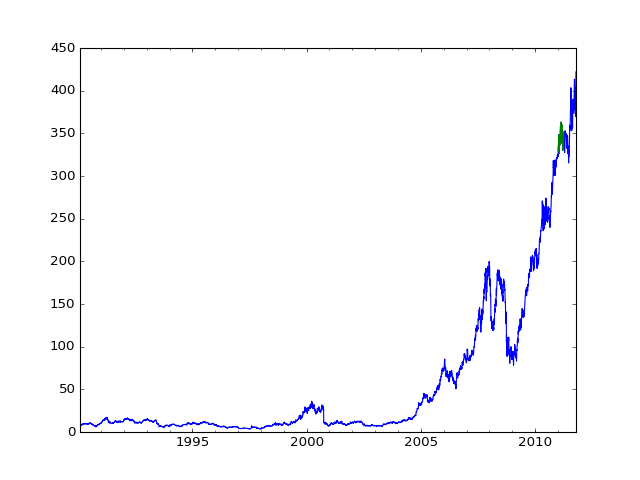

In [15]:
close_px['AAPL'].plot()

<IPython.core.display.Javascript object>


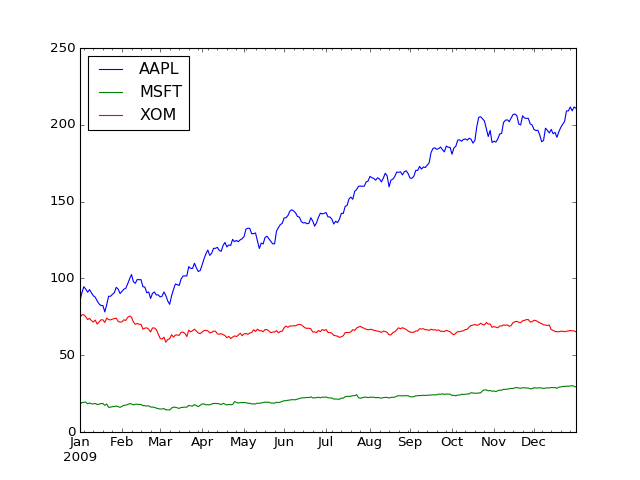

In [22]:
close_px.ix['2009'].plot()

<IPython.core.display.Javascript object>


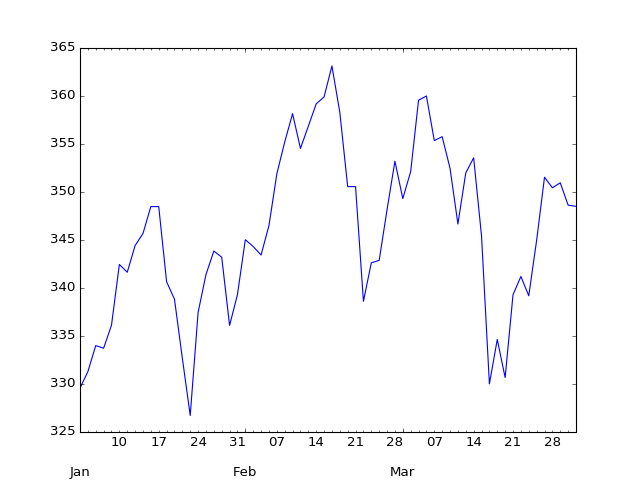

In [24]:
plt.close()
close_px['AAPL'].ix['01-2011':'03-2011'].plot()